In [29]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('styles_light.mplstyle')

import dgrad


## Dados para a regressão

In [48]:
X, y = datasets.make_regression(
    n_samples=300,
    n_features=1,
    n_informative=1,
    n_targets=1,
    bias=0.6,
    effective_rank=None,
    random_state=100,
    noise=70,
    shuffle=True,
)
X = X.ravel()


## Regressão com descida do gradiente

In [53]:
m, b, log, mse = dgrad.descida_gradiente(X, y, lr=0.15, epoch=15)

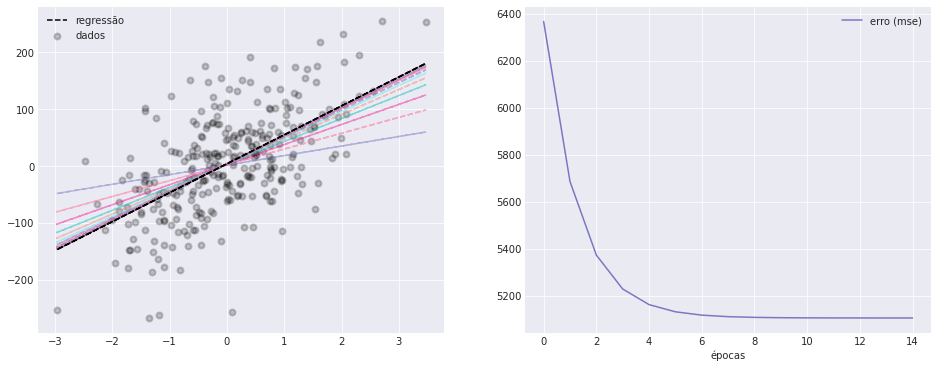

In [61]:
# em preto, a reta final.
# linhas coloridas representam o histórico da otimização.
# pohtos em preto: dataset manequim.

fig, ax = plt.subplots(figsize=(16, 6), ncols=2)
fig.patch.set_facecolor('white')
ax[0].scatter(X, y, color="black", linewidth=2, label="dados", alpha=0.2)

for epoch, erro in zip(log, mse):
    ax[0].plot(X, epoch[0] * X + epoch[1], linestyle="--", alpha=0.5)

ax[0].plot(X, m * X + b, linestyle="--", label="regressão", color="black")
ax[0].legend()

ax[1].plot(mse, label="erro (mse)")
ax[1].set_xlabel("épocas")
ax[1].legend()

fig.savefig("../plots/regressao.png", bbox_inches="tight")
